Metoda 1. Generowanie 100 punktów z przedziału [-100,100] 

In [1]:
from random import uniform, randint
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [2]:
def det(a,b,c):
    return (b[0]*c[1]-c[0]*b[1])-(a[0]*c[1]-a[1]*c[0])+(a[0]*b[1]-b[0]*a[1])

In [3]:
def First_generator(n=100):
    return [ (uniform(-100,100),uniform(-100,100)) for _ in range(n) ]

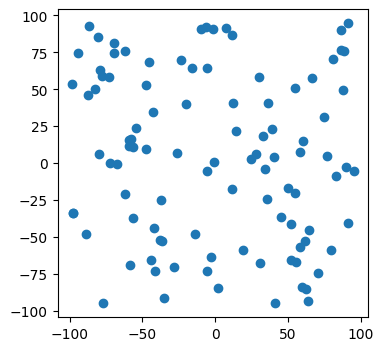

In [8]:
points1 = First_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points1))
# plt.show()
plt.savefig("100_from_100_to_100.png")

Metoda 2. Okrąg o promieniu 10 i centrum (0,0)

In [10]:
def Second_generator(n=100):
    result = [ ]
    for _ in range(n):
        theta = uniform(0,2*np.pi)
        R = 10
        result.append((R*np.cos(theta),R*np.sin(theta)))
    return result

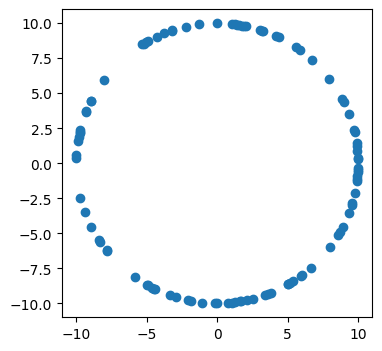

In [11]:
points2 = Second_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points2))
plt.savefig("Circle_of_radius_10_center_0,0.png")

Generator 3. Boki prostokąta 

In [12]:
def Third_generator(n=100):
    result = []
    for _ in range(n):
        x = uniform(-10,10)
        if randint(0,2) % 2 == 0: 
            result.append((x,10*((-1)**randint(0,1))))
        else:
            result.append((10*((-1)**randint(0,1)),x))

    return result

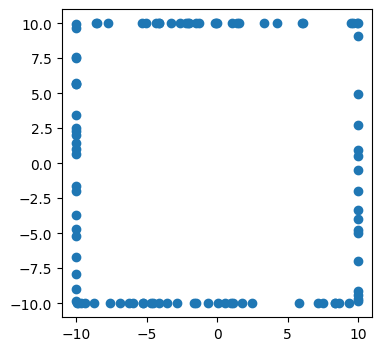

In [16]:
points3 = Third_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points3))
# plt.show()
plt.savefig("10x10_square.png")

In [14]:
def Fourth_generator():
    result = [(0,0),(10,0),(0,10),(10,10)]
    for _ in range(25):
        x = uniform(0,10)
        if randint(0,2) % 2 == 0: 
            result.append((x,0))
        else:
            result.append((0,x))
    for _ in range(20):
        x = uniform(0,10)
        orientation = randint(0,1)
        result.append((x,10*orientation+x*(-1)**orientation))
    return result

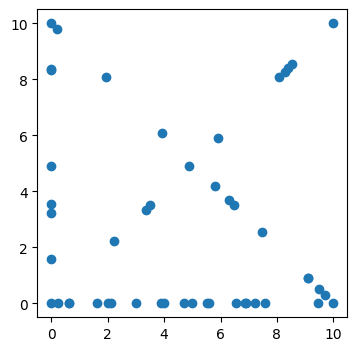

In [15]:
points4 = Fourth_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points4))
plt.savefig("4_corners_OX_OY_diagonal.png")

Implementacja alorytmu Jarvisa

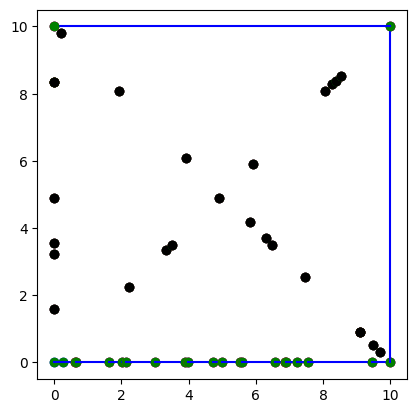

<Figure size 640x480 with 0 Axes>

[(0, 0), (0.2499000977648047, 0), (0.6075591185066287, 0), (0.6405180196479876, 0), (1.6260123278906125, 0), (2.0085252446066093, 0), (2.1293223104942616, 0), (3.0008399499299276, 0), (3.894458150978891, 0), (3.983300535064714, 0), (4.714352616776878, 0), (4.998448271855759, 0), (5.536712070840759, 0), (5.581219809612108, 0), (6.559352947006021, 0), (6.861363367469271, 0), (6.9063965671244425, 0), (7.2179889081084685, 0), (7.565167297137231, 0), (9.454824380022352, 0), (10, 0), (10, 10), (0, 10)]
From: (0, 0) to (0.2499000977648047, 0)
From: (0.2499000977648047, 0) to (0.6075591185066287, 0)
From: (0.6075591185066287, 0) to (0.6405180196479876, 0)
From: (0.6405180196479876, 0) to (1.6260123278906125, 0)
From: (1.6260123278906125, 0) to (2.0085252446066093, 0)
From: (2.0085252446066093, 0) to (2.1293223104942616, 0)
From: (2.1293223104942616, 0) to (3.0008399499299276, 0)
From: (3.0008399499299276, 0) to (3.894458150978891, 0)
From: (3.894458150978891, 0) to (3.983300535064714, 0)
From:

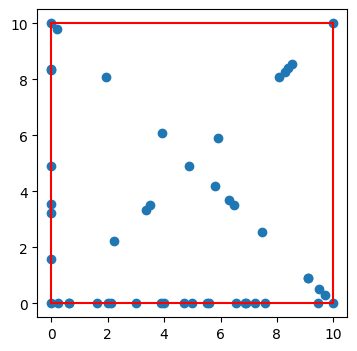

Sorting points
Creating hull
Finished after 0.00023698806762695312 seconds
[(0, 0), (0.2499000977648047, 0), (0.6075591185066287, 0), (0.6405180196479876, 0), (1.6260123278906125, 0), (2.0085252446066093, 0), (2.1293223104942616, 0), (3.0008399499299276, 0), (3.894458150978891, 0), (3.983300535064714, 0), (4.714352616776878, 0), (4.998448271855759, 0), (5.536712070840759, 0), (5.581219809612108, 0), (6.559352947006021, 0), (6.861363367469271, 0), (6.9063965671244425, 0), (7.2179889081084685, 0), (7.565167297137231, 0), (9.454824380022352, 0), (10, 0), (10, 10), (0, 10)]


In [28]:
import math
from IPython import display
def merge(L, R):
    new = []
    i = j = 0
    while i < len(L) and j < len(R):
        if det((0,0),L[i],R[j]) < 0:
            new.append(L[i])
            i += 1
        else:
            new.append(R[j])
            j += 1
    new.extend(L[i:])
    new.extend(R[j:])
    return new

def radial_sort(points):
    if len(points) < 2:
        return points
    mid = len(points) // 2
    left = radial_sort(points[:mid])
    right = radial_sort(points[mid:])
    return merge(left, right)

def point_generator(n=20,x_max=100,x_min=-100,y_max=100,y_min=-100):
    return [ (uniform(x_min,x_max),uniform(y_min,y_max)) for _ in range(n) ] 

def det2x2(a,b,c):
    return ((a[0]-c[0])*(b[1]-c[1]))-((b[0]-c[0])*(a[1]-c[1]))

def Graham_visualized(points,detFun=det2x2):
    result = []
    points = sorted(points, key=lambda p: (p[1], p[0])) 
    starting_point = points[0]
    sorted_points = sorted(points[1:], key=lambda p: math.atan2(p[1] - starting_point[1], p[0] - starting_point[0]))
    fig, ax = plt.subplots()
    ax.set_aspect('equal','box')
    # ax.set_xlim(x_min,x_max)
    # ax.set_ylim(y_min_y_max)
    for point in points:
        ax.plot(*point, 'bo')
    print("Sorting points")
    points = radial_sort(points)
    print(points)
    # Start building the convex hull
    result = [starting_point, sorted_points[0]]
    ax.plot(*starting_point,'go')
    ax.plot(*sorted_points[0],'go')   
    first_line, = ax.plot([starting_point[0], sorted_points[0][0]],[starting_point[1],sorted_points[0][1]],'b-')
    lines_stack = [first_line]
    print("Creating hull")
    previous_point = starting_point 
    for i, point in enumerate(sorted_points[1:]):
        ax.plot(*point, 'ro')
        display.clear_output(wait=True)
        display.display(fig)
        plt.draw()
        plt.pause(0.001)
        while len(result) > 1 and detFun(result[-2], result[-1], point) < 0:
            display.clear_output(wait=True)
            display.display(fig)
            plt.draw()
            plt.pause(0.001)
            lines_stack[-1].remove()
            lines_stack.pop()
            ax.plot(*result[-1],'ko') 
            result.pop()
        line, = ax.plot([point[0], result[-1][0]], [point[1], result[-1][1]],'b-')
        lines_stack.append(line)
        result.append(point)
        ax.plot(*point,'go')
        display.clear_output(wait=True)
        display.display(fig)
        plt.draw()
        plt.pause(0.001)

    print(result)
    return result

def Graham_timed(points,detFun=det):
    result = []
    points = sorted(points, key=lambda p: (p[1], p[0])) 
    starting_point = points[0]
    sorted_points = sorted(points[1:], key=lambda p: math.atan2(p[1] - starting_point[1], p[0] - starting_point[0]))
    print("Sorting points")
    points = radial_sort(points)
    result = [starting_point, sorted_points[0]]
    print("Creating hull")
    start = time()
    previous_point = starting_point 
    for i, point in enumerate(sorted_points[1:]):
        while len(result) > 1 and detFun(result[-2], result[-1], point) < 0:
            result.pop()
        result.append(point)
    finish = time()

    print(f"Finished after {finish - start} seconds")
    print(result)
    return result

def print_hull(points,hull):
    plt.figure(figsize=(4,4))
    plt.scatter(*zip(*points))
    n = len(hull)
    for i in range(n):
        print(f"From: {hull[i]} to {hull[(i+1)%n]}")
        x_values = [hull[i][0], hull[(i+1) % n][0]]
        y_values = [hull[i][1], hull[(i+1) % n][1]]
        
        # Plot a line between the current point and the next
        plt.plot(x_values, y_values, 'r-')
    plt.show()

points_set = [points1,points2,points3,points4]


for points in points_set:
    print_hull(points,Graham_visualized(points))
    Graham_timed(points)



Implementacja algorytmu Grahama

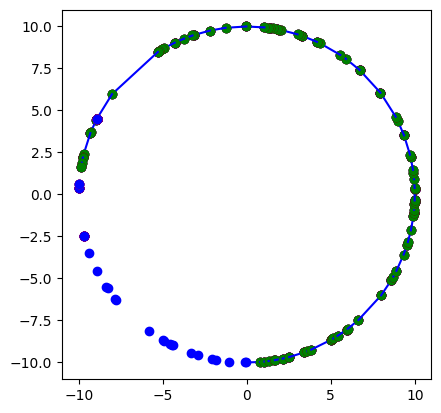

<Figure size 640x480 with 0 Axes>

In [32]:
import math
import matplotlib.pyplot as plt
import copy



# # Auxiliary functions for determining convex hull properties
# def det(a, b, c):
#     return (b[0] * c[1] - c[0] * b[1]) - (a[0] * c[1] - a[1] * c[0]) + (a[0] * b[1] - b[0] * a[1])

def squared_distance(a, b):
    return (a[0] - b[0])**2 + (a[1] - b[1])**2

E = 1e-8
frame_count = 0

def follows(prev, current, next,detFun=det):
    d = detFun(prev, current, next)
    if d < -E:
        return True  
    if d > E:
        return False
    return squared_distance(prev, current) < squared_distance(prev, next)

def choose_next(points, last, current, fig, ax,detFun=det):
    act = current
    prevline = None
    for point in points:
        if act == last or follows(last, act, point,detFun=detFun):
            if act != current:
                ax.plot(*act, 'bo') 
            line, = ax.plot([last[0], act[0]], [last[1], act[1]],'b-')
            if prevline is not None:
                prevline.remove()
            prevline = line
            act = point
            ax.plot(*point, 'ro')
            display.clear_output(wait=True)
            display.display(fig)
            plt.draw()
            plt.pause(0.02)
    if prevline is not None:
        prevline.remove()
    return act

def Jarvis(points,detFun=det):
    points_set = copy.deepcopy(points)
    fig, ax = plt.subplots()
    ax.set_aspect('equal','box')
    for point in points:
        ax.plot(*point, 'bo')
    start = min(points_set, key=lambda x: (x[1], x[0]))  
    hull = [start]
    
    current_point = start
    
    while True:
        next_point = choose_next(points_set, hull[-1], current_point, fig, ax,detFun=detFun)
        ax.plot(*next_point, 'ko')
        display.clear_output(wait=True)
        display.display(fig)
        plt.draw()
        plt.pause(0.2)
        if next_point == start:
            ax.plot(*next_point,'go')
            break  # Completed the hull
        line, = ax.plot([next_point[0], hull[-1][0]], [next_point[1], hull[-1][1]],'b-')
        hull.append(next_point)
        current_point = next_point
        ax.plot(*next_point, 'go')
        display.clear_output(wait=True)
        display.display(fig)
        plt.draw()
        plt.pause(0.2)
    return hull
# Define multiple point sets for testing
points_set = [points1,points2,points3,points4]

# Calculate and plot hulls for each point set
for points in points_set:
    hull = Jarvis(points)
    print_hull(points, hull)
